#### INTRODUCTION

#### REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.cluster import KMeans

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

In [9]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_score, silhouette_samples

### TASK 1: DATA CLEANING

#### LOAD DATASET

In [11]:
df=pd.read_csv('DS1_C9_S7_Project_AbsenteeismAtWork_Data.csv',sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


##### checking data in the excel format to identify any irrelevant entries

##### better display of columns

In [13]:
df.columns=df.columns.str.replace(' ','_')
df

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


##### UNDERSTANDING THE DATA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

##### MISSING VALUE TREATMENT

In [17]:
df.isnull().sum()

ID                                 0
Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

#### CONVERSION OF NUMERICAL COLUMNS TO CATEGORICAL FOR VISUALISATION

##### Reason for absence

In [15]:
threshold=[14,17,21]
bins=['group1','group2','group3','group4']
def assign_reason(val):
    if val<=threshold[0]:
        return bins[0]
    elif val<=threshold[1]:
        return bins[1]
    elif val<=threshold[2]:
        return bins[2]
    else:
        return bins[3]

In [17]:
df['Reason_for_absence_c']=df['Reason_for_absence'].apply(assign_reason)

##### Day of the week

In [19]:
bn2=[0,1,2,3,4,5,6,7]
lbl2=['sunday','monday','tuesday','wednesday','thursday','friday','saturday']
df['Day_of_the_week_c']=pd.cut(df['Day_of_the_week'],bins=bn2,labels=lbl2)

##### Seasons

In [21]:
bn1=[0,1,2,3,4]
lbl1=['summer','winter','autumn','spring']
df['Seasons_c']=pd.cut(df['Seasons'],bins=bn1,labels=lbl1)

##### Age

In [23]:
thrshld=[30,35,40,45,50,55]
bns=['25 to 30','30 to 35','35 to 40','40 to 45','45 to 50','50 to 55','55 to 60']
def assign_age(val):
    if val<=thrshld[0]:
        return bns[0]
    elif val<=thrshld[1]:
        return bns[1]
    elif val<=thrshld[2]:
        return bns[2]
    elif val<=thrshld[3]:
        return bns[3]
    elif val<=thrshld[4]:
        return bns[4]
    elif val<=thrshld[5]:
        return bns[5]
    else:
        return bns[6]

In [25]:
df['Age_c']=df['Age'].apply(assign_age)

##### Hit target

In [27]:
df['Hit_target_c']=np.where(df['Hit_target']>df['Hit_target'].median(),'not reached','reached')

##### Disciplinary failure

In [29]:
bn3=[-1,0,1]
lbl3=['no disciplanary action','action taken']
df['Disciplinary_failure_c']=pd.cut(df['Disciplinary_failure'],bins=bn3,labels=lbl3)

##### Education

In [31]:
bn4=[0,1,2,3,4]
lbl4=['high school','graduate','post grad','Doctor / Masters']
df['Education_c']=pd.cut(df['Education'],bins=bn4,labels=lbl4)

##### Social drinker

In [33]:
bn6=[-1,0,1]
lbl6=['not a drinker','social drinker']
df['Social_drinker_c']=pd.cut(df['Social_drinker'],bins=bn6,labels=lbl6)

##### Social smoker

In [35]:
bn7=[-1,0,1]
lbl7=['Not a smoker','smoker']
df['Social_smoker_c']=pd.cut(df['Social_smoker'],bins=bn7,labels=lbl7)

##### Absenteeism_time_in_hours

In [37]:
df['Absenteeism_time_in_hours_c']=np.where(df['Absenteeism_time_in_hours']>df['Absenteeism_time_in_hours'].mean(),'high-absent','low-absent')

#### TASK2: UNDERSTANDING ABSENTEEISM PATTERN

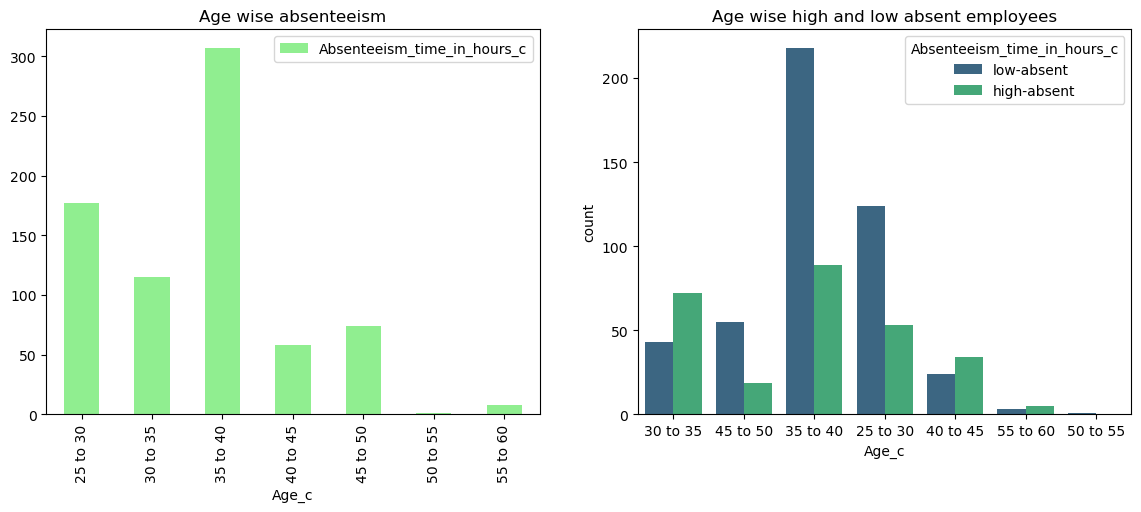

In [43]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x=df['Age_c'],hue=df['Absenteeism_time_in_hours_c'],palette='viridis',ax=ax[1])
df.groupby('Age_c')[['Absenteeism_time_in_hours_c']].count().plot(kind='bar',color='lightgreen',ax=ax[0])
ax[0].set_title('Age wise absenteeism')
ax[1].set_title('Age wise high and low absent employees')
plt.show()

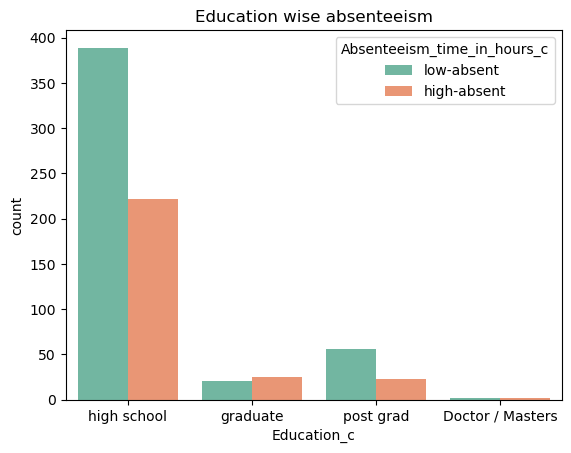

In [217]:
sns.countplot(x=df['Education_c'],hue=df['Absenteeism_time_in_hours_c'],palette='Set2')
plt.title('Education wise absenteeism')
plt.show()

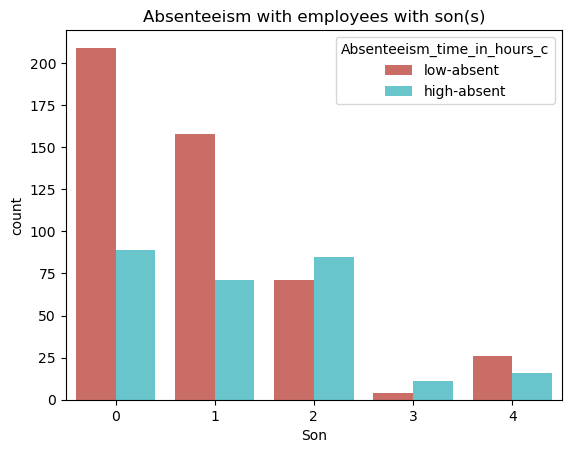

In [47]:
sns.countplot(x=df['Son'],hue=df['Absenteeism_time_in_hours_c'],palette='hls')
plt.title('Absenteeism with employees with son(s)')
plt.show()

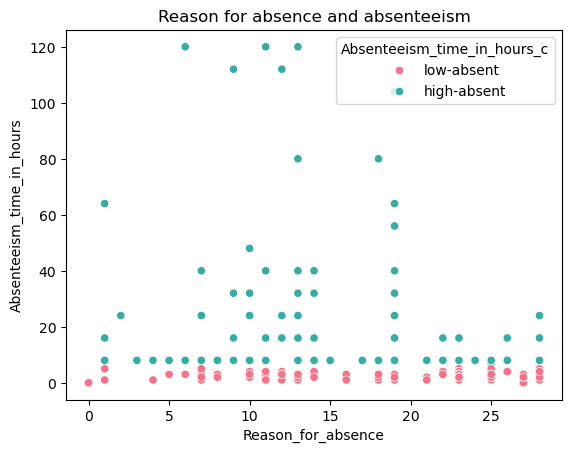

In [49]:
sns.scatterplot(data=df,x='Reason_for_absence',y='Absenteeism_time_in_hours',hue='Absenteeism_time_in_hours_c',palette='husl')
plt.title('Reason for absence and absenteeism')
plt.show()

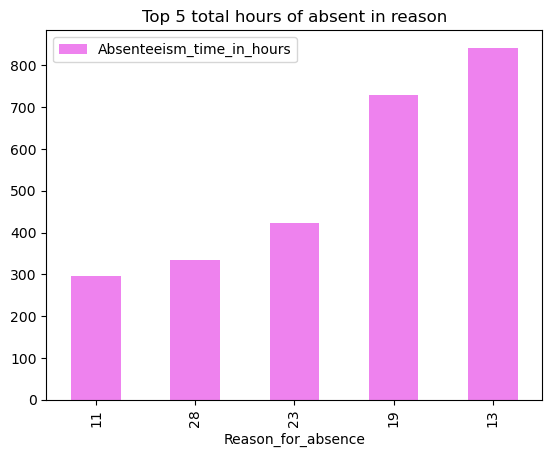

In [211]:
df.groupby('Reason_for_absence')[['Absenteeism_time_in_hours']].sum().sort_values('Absenteeism_time_in_hours').tail(5).plot(kind='bar',color='violet')
plt.title('Top 5 total hours of absent in reason') 
plt.show()

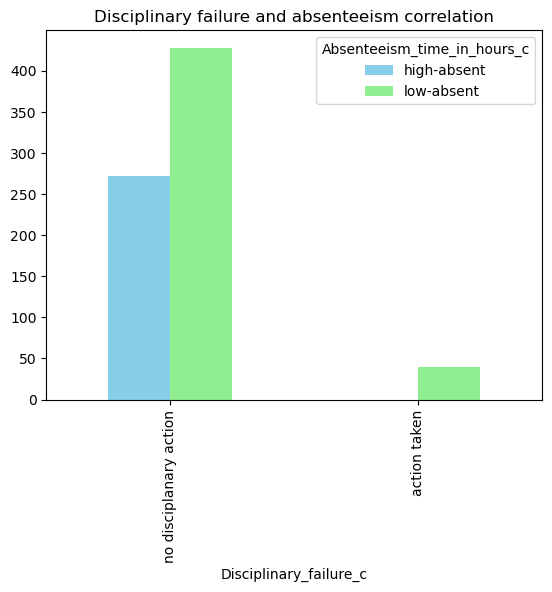

In [51]:
pd.crosstab(df['Disciplinary_failure_c'],df['Absenteeism_time_in_hours_c']).plot(kind='bar',color=['skyblue','lightgreen'])
plt.title('Disciplinary failure and absenteeism correlation')
plt.show()

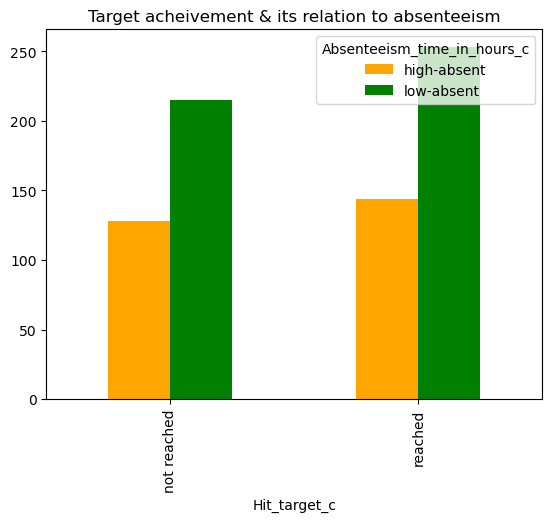

In [53]:
pd.crosstab(df['Hit_target_c'],df['Absenteeism_time_in_hours_c']).plot(kind='bar',color=['orange','green'])
plt.title('Target acheivement & its relation to absenteeism')
plt.show()

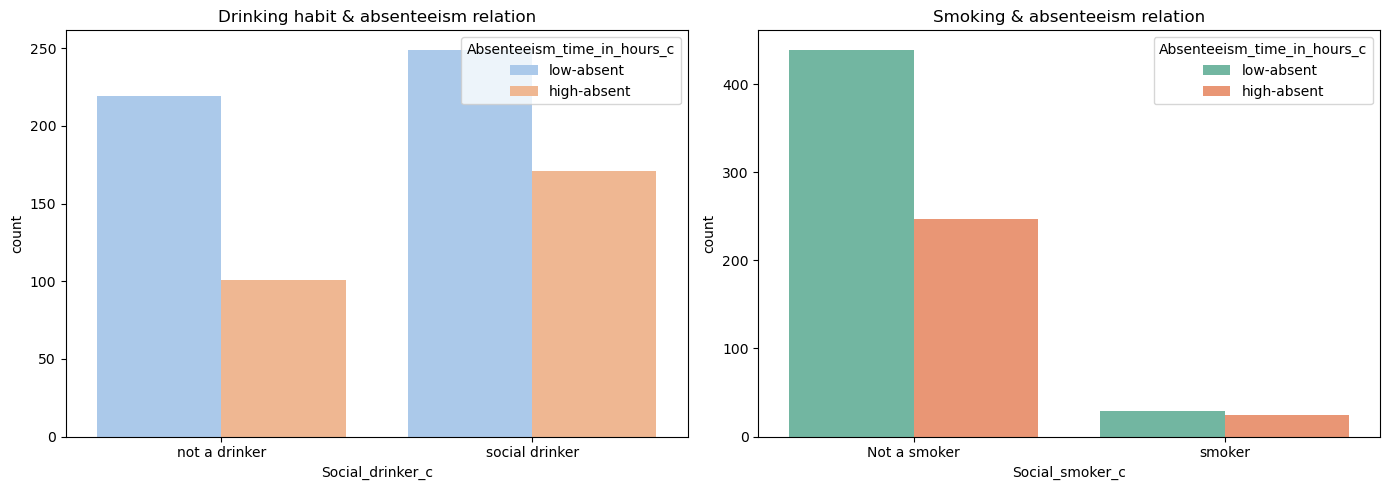

In [219]:
fig,ax=plt.subplots(1,2,figsize=(14,5),tight_layout=True)
sns.countplot(x=df['Social_drinker_c'],hue=df['Absenteeism_time_in_hours_c'],palette='pastel',ax=ax[0])
sns.countplot(x=df['Social_smoker_c'],hue=df['Absenteeism_time_in_hours_c'],palette='Set2',ax=ax[1])
ax[0].set_title('Drinking habit & absenteeism relation')
ax[1].set_title('Smoking & absenteeism relation')
plt.show()

In [ ]:
The dataset contains records of absenteeism at work from July 2007 to July 2010 at 
a courier company in Brazil.

In [ ]:
ABSENTEEISM PATTERN:
The most hours of absence are due to muscle related complications followed by injuries.
Employees who are graduates, are mostly under high absentee category than low absentee category.
Most of the employees age in the range, 30 to 35 and 40 to 45 are absent above average.
Family oriented employees who has 2 or 3 children are more prone to take leave than any other employees.
Transportation expense also plays a vital role in employee absenteeism, forcing the employees to miss work.
Certain habits of employee like smoking habit and drinking influences the rate if high absenteeism.

#### TASK3: REASONS FOR ABSENTEEISM ANALYSIS

#### Exploartory Data Analysis on high absenteeism in employees 

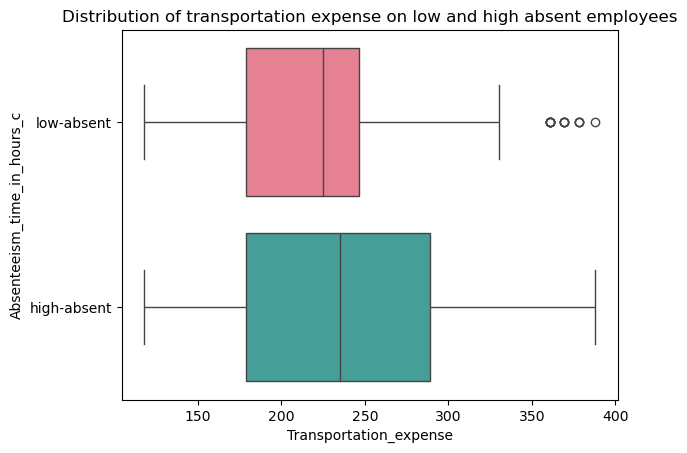

In [58]:
sns.boxplot(x=df['Transportation_expense'],y=df['Absenteeism_time_in_hours_c'],palette='husl')
plt.title('Distribution of transportation expense on low and high absent employees')
plt.show()

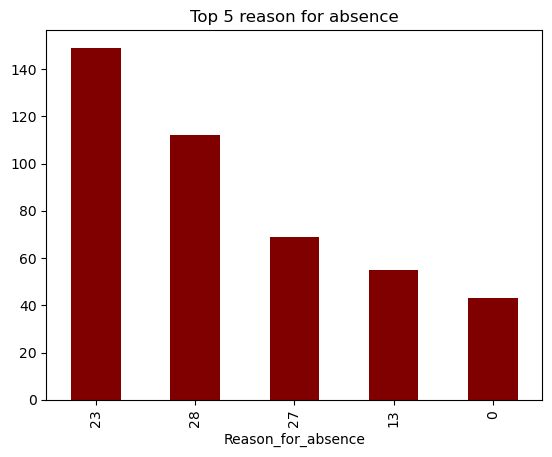

In [60]:
srtd=df['Reason_for_absence'].value_counts().head(5)
srtd.plot(kind='bar',color='maroon')
plt.title('Top 5 reason for absence')
plt.show()

##### 23: Medical Consulatation 
##### 27: Physiotherapy
##### 28: Dental Consulatation

In [86]:
# Filter the data set for top 3 reasons
filter1=df[(df['Reason_for_absence']==23)|(df['Reason_for_absence']==27)|(df['Reason_for_absence']==28)]

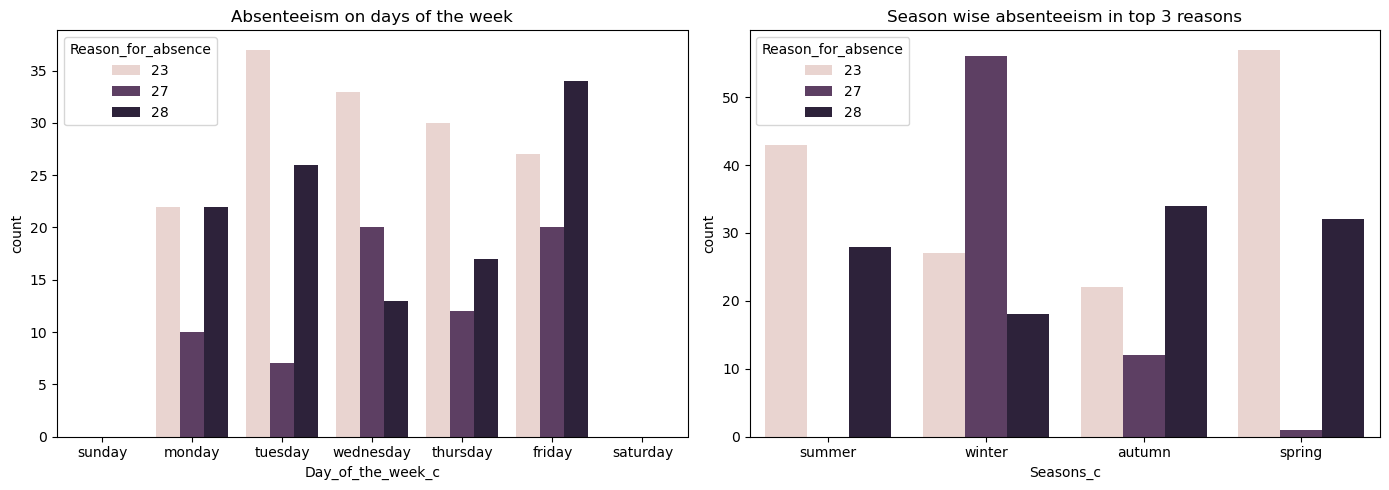

In [88]:
fig,ax=plt.subplots(1,2,figsize=(14,5),tight_layout=True)
sns.countplot(x=filter1['Day_of_the_week_c'],hue=filter1['Reason_for_absence'],ax=ax[0])
sns.countplot(x=filter1['Seasons_c'],hue=filter1['Reason_for_absence'],ax=ax[1])
ax[0].set_title('Absenteeism on days of the week')
ax[1].set_title('Season wise absenteeism in top 3 reasons')
plt.show()

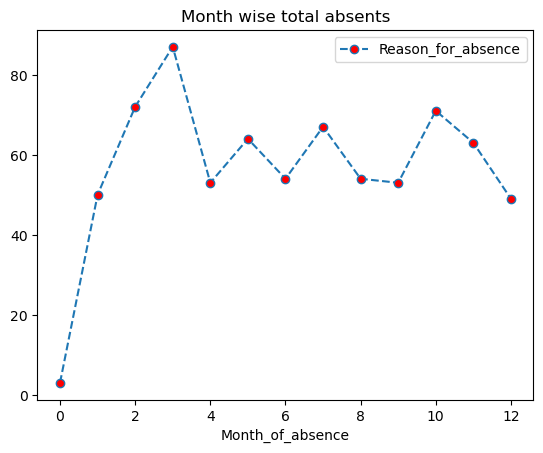

In [68]:
df.groupby('Month_of_absence')[['Reason_for_absence']].count().plot(kind='line',linestyle='--',marker='o',markerfacecolor='red')
plt.title('Month wise total absents')
plt.show()

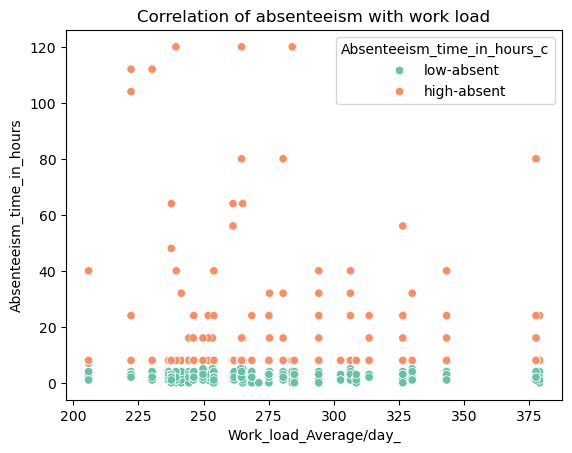

In [70]:
sns.scatterplot(data=df,x='Work_load_Average/day_',y='Absenteeism_time_in_hours',hue='Absenteeism_time_in_hours_c',palette='Set2')
plt.title('Correlation of absenteeism with work load')
plt.show()

##### OUTLIER ANALYSIS

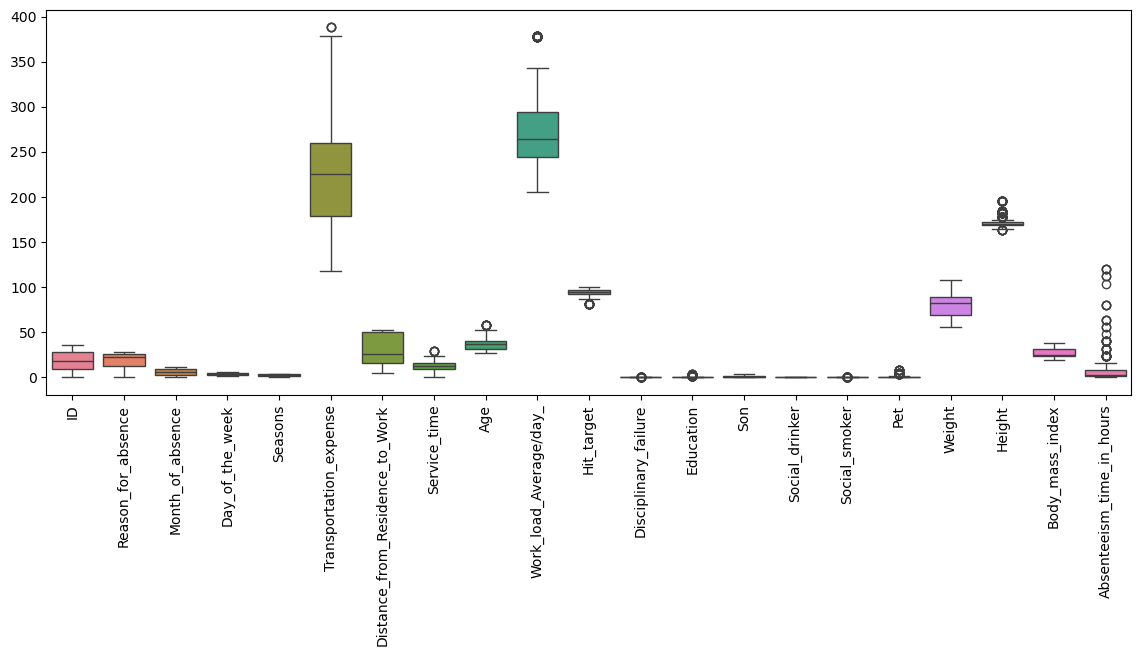

In [65]:
sns.boxplot(data=df)
plt.gcf().set_size_inches(14,5)
plt.xticks(rotation=90)
plt.show()

#### TASK4: pREDICTING aBSENTEEISM DURATION

##### SEPERATE NUMERIC COLUMNS INTO A DATAFRAME

In [39]:
categ=['object','category']
emp_df=df.select_dtypes(exclude=categ)

In [74]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason_for_absence               740 non-null    int64  
 2   Month_of_absence                 740 non-null    int64  
 3   Day_of_the_week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation_expense           740 non-null    int64  
 6   Distance_from_Residence_to_Work  740 non-null    int64  
 7   Service_time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work_load_Average/day_           740 non-null    float64
 10  Hit_target                       740 non-null    int64  
 11  Disciplinary_failure             740 non-null    int64  
 12  Education             

##### SET 
##### TARGET = Absenteeism_time_in_hours

#### FEATURE SELECTION

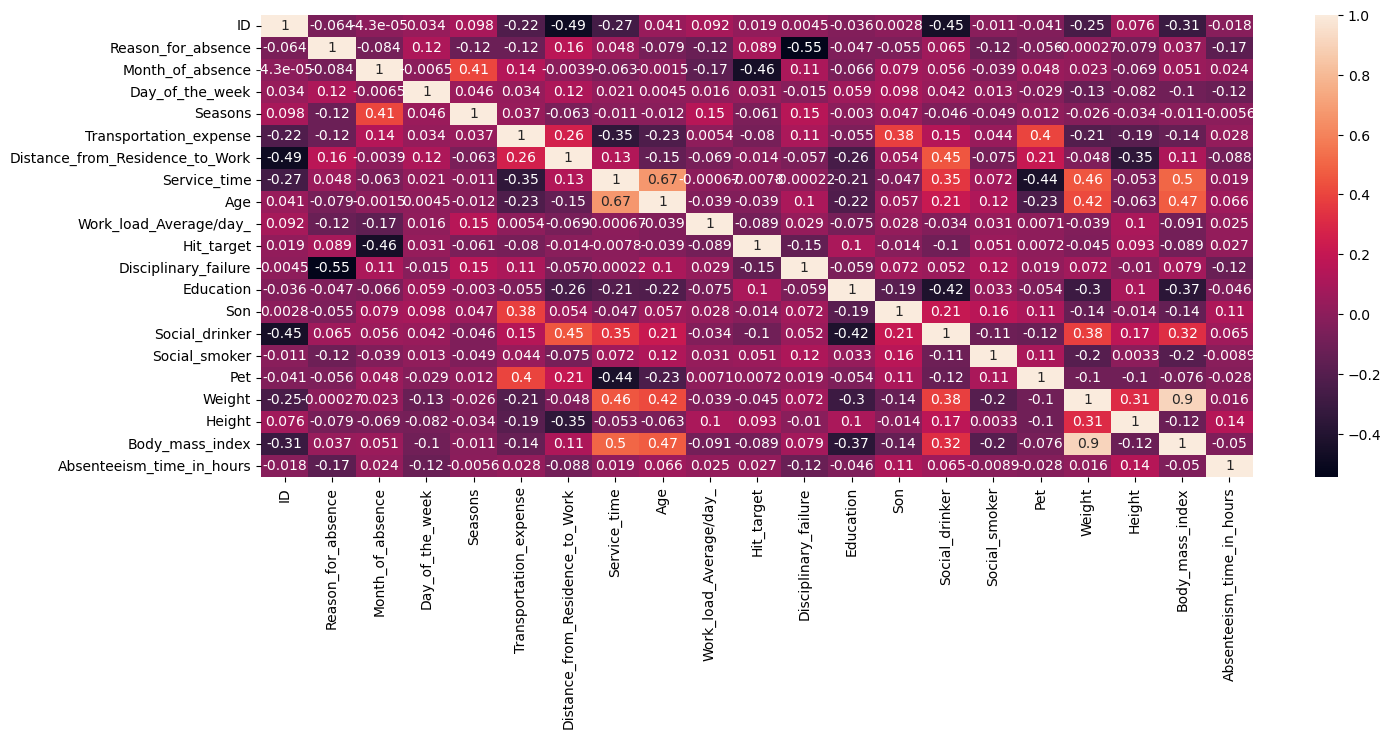

In [76]:
sns.heatmap(emp_df.corr(),annot=True)
plt.gcf().set_size_inches(16,6)
plt.show()

In [80]:
abs(emp_df.corr())>0.7

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
ID,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Reason_for_absence,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Month_of_absence,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Day_of_the_week,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Seasons,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Transportation_expense,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Distance_from_Residence_to_Work,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Service_time,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Age,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
Work_load_Average/day_,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


##### Drop featurs that are highly correlated within each other

In [41]:
emp_df=emp_df.drop('Weight',axis=1)

#### DATA SCALING

In [43]:
col=emp_df.columns
scale=StandardScaler()
df_scl=scale.fit_transform(emp_df)
emp_df1=pd.DataFrame(df_scl,columns=col)

##### Correlation with target

In [71]:
abs(emp_df1.corr()[['Absenteeism_time_in_hours']]).sort_values('Absenteeism_time_in_hours',ascending=False)

,Absenteeism_time_in_hours
Absenteeism_time_in_hours,1.000000
Reason_for_absence,0.173116
Height,0.144420
Day_of_the_week,0.124361
Disciplinary_failure,0.124248
Son,0.113756
Distance_from_Residence_to_Work,0.088363
Age,0.065760
Social_drinker,0.065067
Body_mass_index,0.049719


#### Linear Model

##### Feature and Target

In [55]:
X1=np.array(emp_df1['Reason_for_absence']).reshape(-1,1)
y=np.array(emp_df1['Absenteeism_time_in_hours'])

##### splitting dataset

In [57]:
X_tr1,X_tst1,y_tr1,y_tst1=train_test_split(X1,y,test_size=0.3,random_state=0)

In [59]:
# Build & fitting model
lin_model=LinearRegression().fit(X_tr1,y_tr1)

In [61]:
# features of model 1
print('Intercept:',lin_model.intercept_)
print('Slope:',lin_model.coef_)

Intercept: 0.00015035741752220826
Slope: [-0.16834386]


In [95]:
# predicting the model
y_pred1=lin_model.predict(X_tst1)

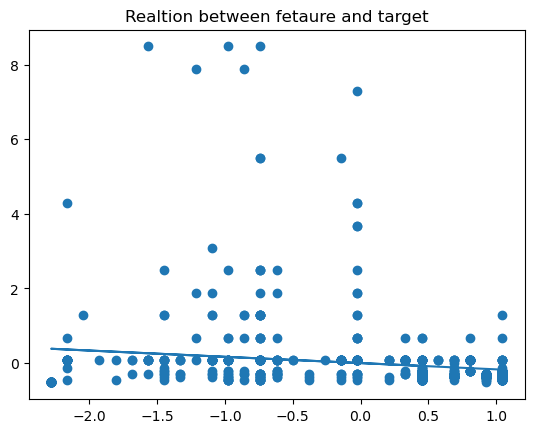

In [97]:
plt.scatter(emp_df1['Reason_for_absence'],emp_df1['Absenteeism_time_in_hours'])
plt.plot(X_tst1,y_pred1)
plt.title('Realtion between fetaure and target')
plt.show()

In [99]:
# Evaluation of Model
mse1=mean_squared_error(y_tst1,y_pred1)
mae1=mean_absolute_error(y_tst1,y_pred1)
rms1=mean_squared_error(y_tst1,y_pred1,squared=False)
r2score1=r2_score(y_tst1,y_pred1)
print('MSE:',mse1)
print('MAE:',mae1)
print('RMSE:',rms1)
print('R2 score:',r2score1)

MSE: 0.8258130255146046
MAE: 0.43534658614751787
RMSE: 0.9087425518344591
R2 score: 0.04117660571760906


#### Multi model 1

##### 2 Features and Target

In [63]:
X2=np.array(emp_df1[['Reason_for_absence','Disciplinary_failure']]).reshape(-1,2)
y=np.array(emp_df1['Absenteeism_time_in_hours'])

##### splitting dataset

In [66]:
X_tr2,X_tst2,y_tr2,y_tst2=train_test_split(X2,y,test_size=0.3,random_state=0)

In [68]:
# Build & fitting model
mult_model2=LinearRegression().fit(X_tr2,y_tr2)

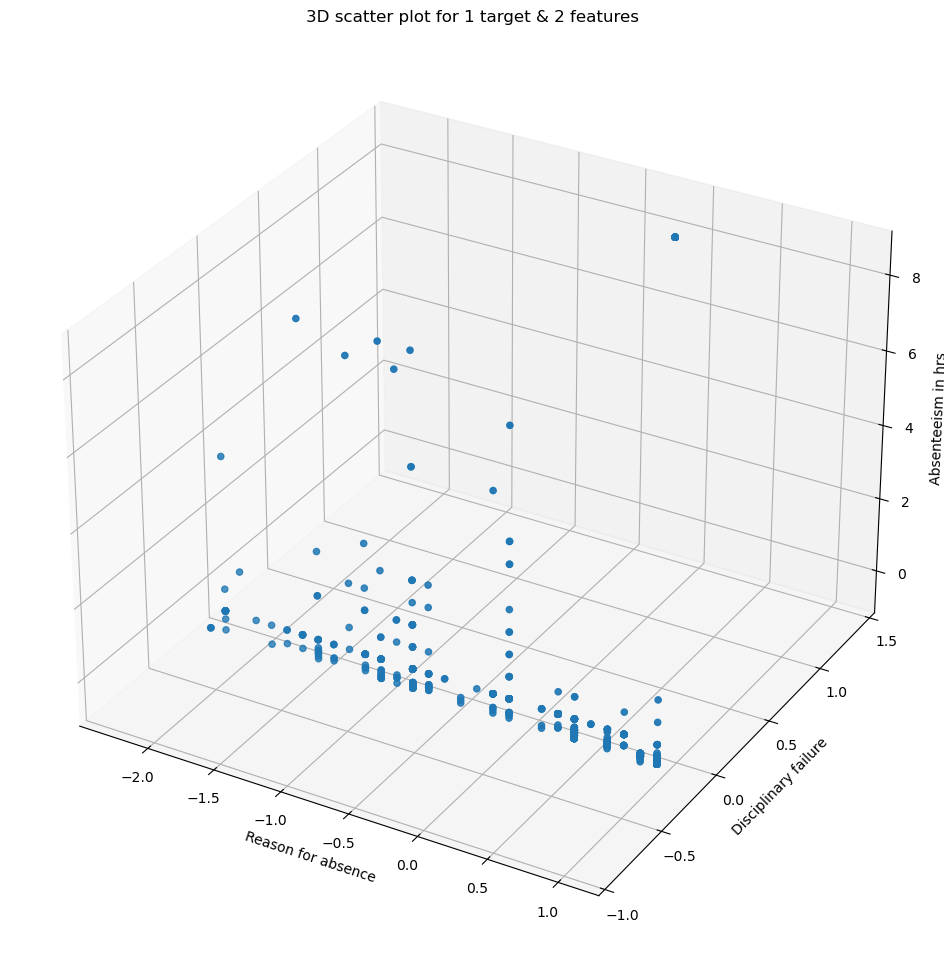

In [107]:
x=X2[:,0]
x2=X2[:,1]
z=y
fig=plt.figure(figsize=(16,12))
ax=plt.axes(projection='3d')
ax.scatter3D(x,x2,z)
ax.set_xlabel('Reason for absence')
ax.set_ylabel('Disciplinary failure')
ax.set_zlabel('Absenteeism in hrs')
ax.set_title('3D scatter plot for 1 target & 2 features')
plt.ylim(-1,1.5)
plt.show()

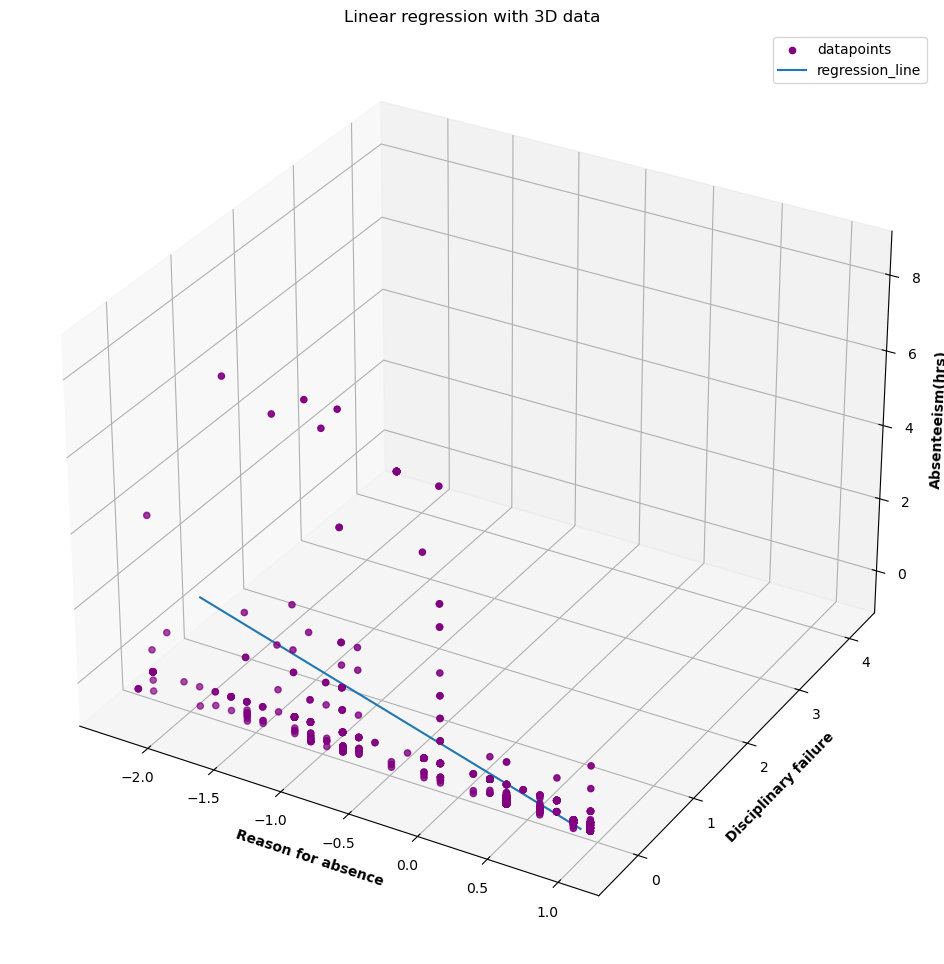

In [82]:
# visualise
y1=np.array(emp_df1['Absenteeism_time_in_hours'])
x=X2[:,0]
y=X2[:,1]
z=y1
x1_line=np.arange(min(x),max(x),0.1)
x2_line=np.array([mult_model2.coef_[0]*val+(-mult_model2.intercept_+mult_model2.coef_[1]*np.mean(y))for val in x1_line])
y_line=mult_model2.coef_[0]*x1_line + mult_model2.coef_[1]*x2_line + mult_model2.intercept_
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111,projection='3d')
#ax.grid(b=True,)
ax.scatter3D(x,y,z,color='purple',label='datapoints')
# plor reg line
ax.plot(x1_line,x2_line,y_line,label='regression_line')
ax.set_xlabel('Reason for absence',fontweight='bold')
ax.set_ylabel('Disciplinary failure',fontweight='bold')
#plt.xlim(-2,1.5)
ax.set_zlabel('Absenteeism(hrs)',fontweight='bold')
ax.set_title('Linear regression with 3D data')
ax.legend()
plt.show()

In [109]:
# features of model 2
print('Intercept:',mult_model2.intercept_)
print('Slope:',mult_model2.coef_)

Intercept: 0.0022464987076471887
Slope: [-0.34432103 -0.31245854]


In [111]:
# predicting the model
y_pred2=mult_model2.predict(X_tst2)

In [113]:
# Evaluation of Model
mse2=mean_squared_error(y_tst2,y_pred2)
mae2=mean_absolute_error(y_tst2,y_pred2)
rms2=mean_squared_error(y_tst2,y_pred2,squared=False)
r2score2=r2_score(y_tst2,y_pred2)
print('MSE:',mse2)
print('MAE:',mae2)
print('RMSE:',rms2)
print('R2 score:',r2score2)

MSE: 0.756650995932312
MAE: 0.4124862665398797
RMSE: 0.8698568824423429
R2 score: 0.12147828407661676


#### Multi model 2

##### 3 Features and Target

In [49]:
X3=np.array(emp_df1[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work']]).reshape(-1,3)
y=np.array(emp_df1['Absenteeism_time_in_hours'])

##### splitting dataset

In [51]:
X_tr3,X_tst3,y_tr3,y_tst3=train_test_split(X3,y,test_size=0.3,random_state=0)

In [53]:
# Build & fitting model
mult_model3=LinearRegression().fit(X_tr3,y_tr3)

In [121]:
# features of model 3
print('Intercept:',mult_model3.intercept_)
print('Slope:',mult_model3.coef_)

Intercept: 0.003144794277386593
Slope: [-0.33721941 -0.31069465 -0.03791473]


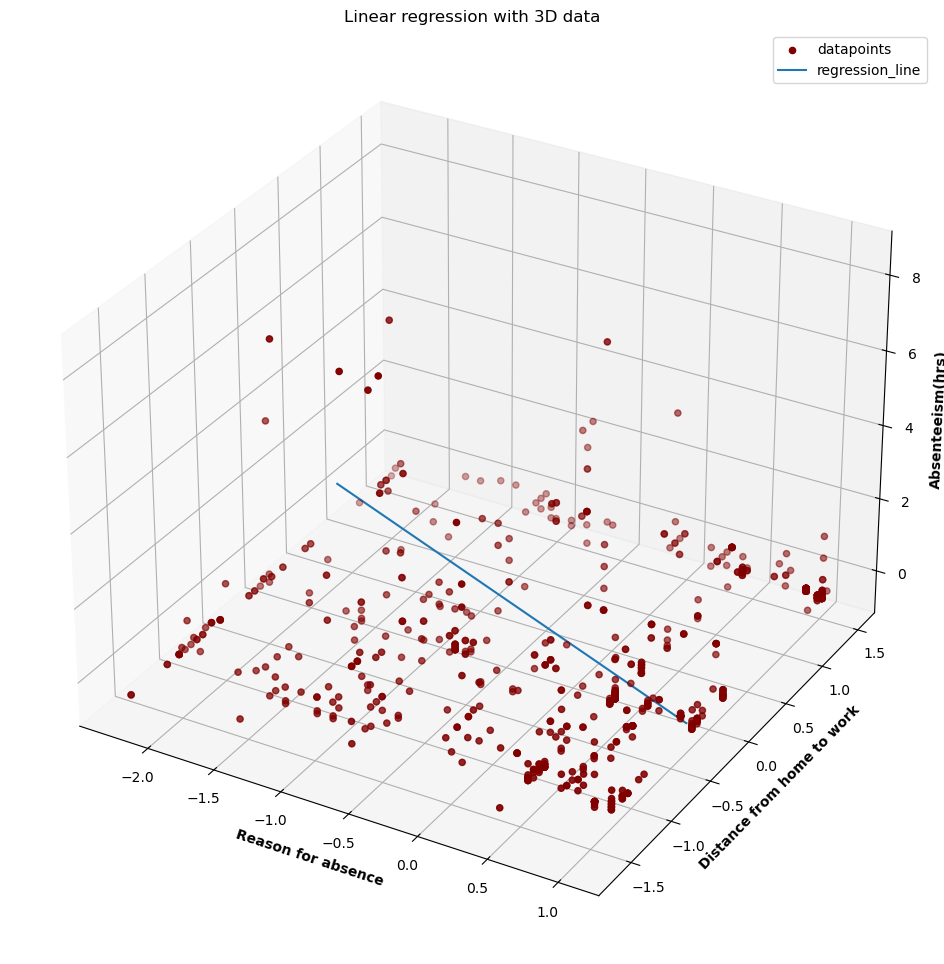

In [76]:
# visualise
y1=np.array(emp_df1['Absenteeism_time_in_hours'])
x=X3[:,0]
y=X3[:,2]
z=y1
x1_line=np.arange(min(x),max(x),0.1)
x2_line=np.array([mult_model3.coef_[0]*val+(-mult_model3.intercept_+mult_model3.coef_[1]*np.mean(y))for val in x1_line])
y_line=mult_model3.coef_[0]*x1_line + mult_model3.coef_[1]*x2_line + mult_model3.intercept_
fig=plt.figure(figsize=(16,12))
ax=fig.add_subplot(111,projection='3d')
#ax.grid(b=True,)
ax.scatter3D(x,y,z,color='maroon',label='datapoints')
# plor reg line
ax.plot(x1_line,x2_line,y_line,label='regression_line')
ax.set_xlabel('Reason for absence',fontweight='bold')
ax.set_ylabel('Distance from home to work',fontweight='bold')
#plt.xlim(-2,1.5)
ax.set_zlabel('Absenteeism(hrs)',fontweight='bold')
ax.set_title('Linear regression with 3D data')
ax.legend()
plt.show()

In [123]:
# predicting the model
y_pred3=mult_model3.predict(X_tst3)

In [125]:
# Evaluation of Model
mse3=mean_squared_error(y_tst3,y_pred3)
mae3=mean_absolute_error(y_tst3,y_pred3)
rms3=mean_squared_error(y_tst3,y_pred3,squared=False)
r2score3=r2_score(y_tst3,y_pred3)
print('MSE:',mse3)
print('MAE:',mae3)
print('RMSE:',rms3)
print('R2 score:',r2score3)

MSE: 0.7518097945110118
MAE: 0.4164567001156388
RMSE: 0.867069659549342
R2 score: 0.1270992382584465


#### Multi model 3

##### 4 Features and Target

In [127]:
X4=np.array(emp_df1[['Reason_for_absence','Disciplinary_failure','Distance_from_Residence_to_Work','Body_mass_index']]).reshape(-1,4)
y=np.array(emp_df1['Absenteeism_time_in_hours'])

##### splitting dataset

In [129]:
X_tr4,X_tst4,y_tr4,y_tst4=train_test_split(X4,y,test_size=0.3,random_state=0)

In [131]:
# Build & fitting model
mult_model4=LinearRegression().fit(X_tr4,y_tr4)

In [133]:
# features of model 4
print('Intercept:',mult_model4.intercept_)
print('Slope:',mult_model4.coef_)

Intercept: 0.003137515397358003
Slope: [-0.33733419 -0.31086049 -0.03809437  0.00126656]


In [135]:
# predicting the model
y_pred4=mult_model4.predict(X_tst4)

In [137]:
# Evaluation of Model
mse4=mean_squared_error(y_tst4,y_pred4)
mae4=mean_absolute_error(y_tst4,y_pred4)
rms4=mean_squared_error(y_tst4,y_pred4,squared=False)
r2score4=r2_score(y_tst4,y_pred4)
print('MSE:',mse4)
print('MAE:',mae4)
print('RMSE:',rms4)
print('R2 score:',r2score4)

MSE: 0.7518726636700465
MAE: 0.41647510228322737
RMSE: 0.8671059126024032
R2 score: 0.1270262430178789


Homoscedasticity and error distribution plot for the best out of the 4 models is done

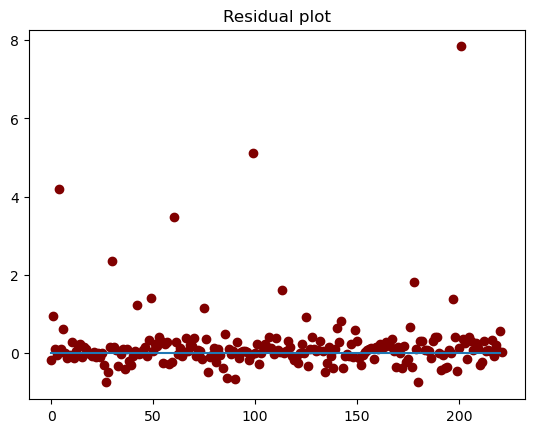

In [233]:
df_new=pd.DataFrame({'Ac':y_tst3,'Pr':y_pred3})
df_new['res']=abs(df_new['Ac'])-abs(df_new['Pr'])
plt.scatter(df_new.index,df_new.res,color='maroon')
plt.plot(np.repeat(0,df_new.index.max()))
plt.title('Residual plot')
plt.show()

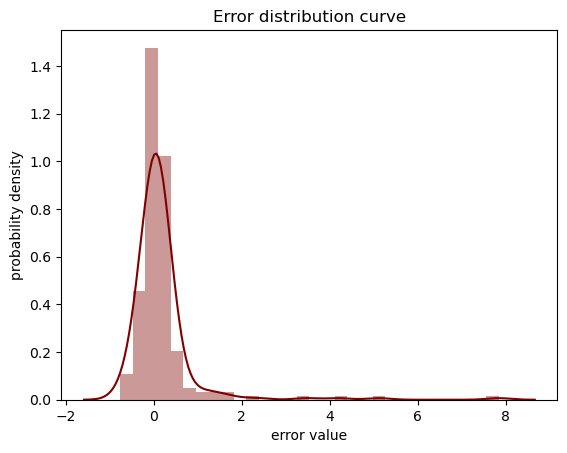

In [141]:
sns.distplot(df_new.res,bins=30,kde=True,color='maroon')
plt.xlabel('error value')
plt.ylabel('probability density')
plt.title('Error distribution curve')
plt.show()

### PROJECT 2

#### TASK1

#### LOGISTIC MODEL

In [143]:
# Rearranging categorical column represented as nerical columns
col_to_drop=['Disciplinary_failure', 'Social_drinker','Social_smoker']
df_temp=df[['Disciplinary_failure', 'Social_drinker','Social_smoker','Absenteeism_time_in_hours_c']]
emp_df1=emp_df1.drop(col_to_drop,axis=1)
empl1=pd.concat([emp_df1,df_temp],axis=1)
empl1

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Education,Son,Pet,Height,Body_mass_index,Absenteeism_time_in_hours,Disciplinary_failure,Social_drinker,Social_smoker,Absenteeism_time_in_hours_c
0,-0.637161,0.804938,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.433857,0.893723,0.192850,-0.019046,0.775932,-0.219511,0,1,0,low-absent
1,1.632719,-2.280124,0.196763,-0.643947,-1.390175,-1.544379,-1.121694,1.242825,2.092860,-0.818212,...,-0.433857,-0.017234,-0.566240,0.975828,1.009438,-0.519767,1,1,0,low-absent
2,-1.363523,0.448970,0.196763,0.059924,-1.390175,-0.632665,1.441240,1.242825,0.239405,-0.818212,...,-0.433857,-0.928191,-0.566240,-0.350671,1.009438,-0.369639,0,1,0,low-absent
3,-1.000342,-1.449530,0.196763,0.763796,-1.390175,0.861947,-1.661258,0.329981,0.393859,-0.818212,...,-0.433857,0.893723,-0.566240,-0.682295,-0.625100,-0.219511,0,1,1,low-absent
4,-0.637161,0.448970,0.196763,0.763796,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.818212,...,-0.433857,0.893723,0.192850,-0.019046,0.775932,-0.369639,0,1,0,low-absent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,-0.637161,-0.618937,0.196763,-0.643947,-1.390175,1.011408,0.429556,0.101770,-0.532868,-0.176427,...,-0.433857,0.893723,0.192850,-0.019046,0.775932,0.080744,0,1,0,high-absent
736,-1.545113,-0.974905,0.196763,-0.643947,-1.390175,0.204318,-1.256585,0.329981,0.084950,-0.176427,...,2.538869,-0.017234,0.192850,-0.019046,0.542427,-0.219511,0,0,0,low-absent
737,-1.272728,-2.280124,-1.841698,-0.643947,-1.390175,-1.544379,-1.054248,0.101770,0.548314,-0.006949,...,-0.433857,-0.017234,5.506478,-0.350671,1.709954,-0.519767,0,1,0,low-absent
738,-0.909547,-2.280124,-1.841698,0.059924,-0.490149,0.144533,0.362110,0.329981,0.393859,-0.006949,...,-0.433857,0.893723,0.951940,-0.350671,1.943459,-0.519767,0,1,0,low-absent


In [145]:
empl1['high_absenteeism']=np.where(empl1['Absenteeism_time_in_hours']>empl1['Absenteeism_time_in_hours'].mean(),1,0)

In [147]:
empl1['high_absenteeism'].value_counts()

high_absenteeism
0    468
1    272
Name: count, dtype: int64

In [149]:
empl=empl1.drop(['Absenteeism_time_in_hours_c','Absenteeism_time_in_hours'],axis=1)

In [151]:
# data splitting
train,test=train_test_split(empl,test_size=0.2,random_state=0)
y_train=train['high_absenteeism']
X_train=train.drop('high_absenteeism',axis=1)
y_test=test['high_absenteeism']
X_test=test.drop('high_absenteeism',axis=1)

In [153]:
# Fitting & predicting
logreg=LogisticRegression().fit(X_train,y_train)
y_prd_log=logreg.predict(X_test)

In [155]:
# confusion matrix
print(confusion_matrix(y_test,y_prd_log))

[[77  8]
 [25 38]]


In [157]:
# evaluation
print('Accuracy:',accuracy_score(y_test,y_prd_log))
print('recall:',recall_score(y_test,y_prd_log))
print('precision:',precision_score(y_test,y_prd_log))
print('f1:',f1_score(y_test,y_prd_log))
print('roc auc score:',roc_auc_score(y_test,y_prd_log))

Accuracy: 0.777027027027027
recall: 0.6031746031746031
precision: 0.8260869565217391
f1: 0.6972477064220184
roc auc score: 0.7545284780578899


In [159]:
print('Roc probablilty:',roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1]))

Roc probablilty: 0.8418300653594771


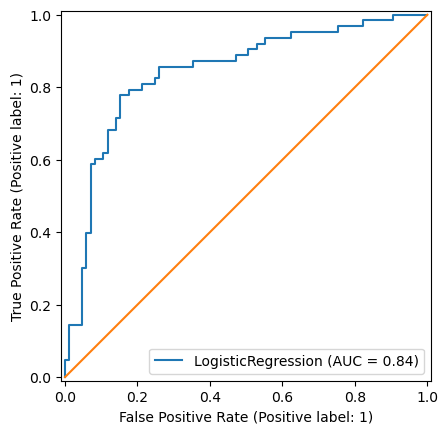

In [161]:
RocCurveDisplay.from_estimator(logreg,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

#### KN NEIGHBORING

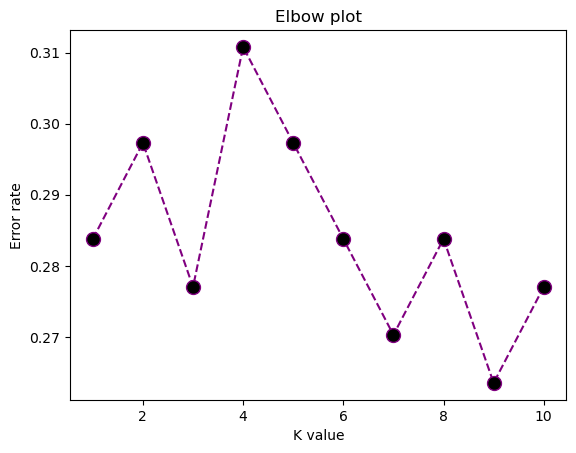

In [227]:
error=[]
for i in range(1,11):
    kn=neighbors.KNeighborsClassifier(n_neighbors=i)
    kn.fit(X_train,y_train)
    y_prd_kn=kn.predict(X_test)
    error.append(np.mean(y_prd_kn!=y_test))
plt.plot(range(1,11),error,linestyle='--',color='purple',marker='o',markerfacecolor='0',markersize=10)
plt.xlabel('K value')
plt.ylabel('Error rate')
plt.title('Elbow plot')
plt.show()

In [165]:
k=9
kn_mod=neighbors.KNeighborsClassifier(n_neighbors=k)
kn_mod.fit(X_train,y_train)
y_pred_knn=kn_mod.predict(X_test)
y_pred_knn

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [167]:
print('Accuracy:',accuracy_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn,average='micro'))
print('precision:',precision_score(y_test,y_pred_knn,average='micro'))
print('f1:',f1_score(y_test,y_pred_knn,average='micro'))
print('roc auc score:',roc_auc_score(y_test,y_pred_knn,average='micro'))

Accuracy: 0.7364864864864865
recall: 0.7364864864864865
precision: 0.7364864864864865
f1: 0.7364864864864865
roc auc score: 0.7069094304388422


In [169]:
y_prob_knn=kn_mod.predict_proba(X_test)[:,1]
print('Roc probablilty:',roc_auc_score(y_test,y_prob_knn,multi_class='ovr'))

Roc probablilty: 0.7904761904761904


#### BEST MODEL

#### TASK2

#### KMEANS CLUSTERING

In [171]:
df_clstr=empl1[['Absenteeism_time_in_hours','Reason_for_absence']]
df_clstr

,Absenteeism_time_in_hours,Reason_for_absence
0,-0.219511,0.804938
1,-0.519767,-2.280124
2,-0.369639,0.448970
3,-0.219511,-1.449530
4,-0.369639,0.448970
...,...,...
735,0.080744,-0.618937
736,-0.219511,-0.974905
737,-0.519767,-2.280124
738,-0.519767,-2.280124


In [173]:
# check for k=2
km=KMeans(n_clusters=2)
km.fit(df_clstr)
km_cntr=km.cluster_centers_
km_cntr

array([[-0.21647823,  0.61748547],
       [ 0.43737438, -1.24757268]])

In [175]:
km_lbl=km.labels_
km_lbl

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,

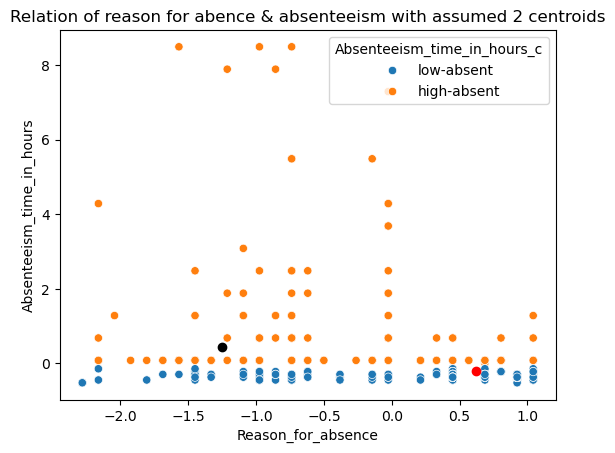

In [177]:
sns.scatterplot(data=empl1,x='Reason_for_absence',y='Absenteeism_time_in_hours',hue='Absenteeism_time_in_hours_c')
plt.scatter(-1.24757268,0.43737438,color='black')
plt.scatter(0.61748547,-0.21647823,color='red')
plt.title('Relation of reason for abence & absenteeism with assumed 2 centroids')
plt.show()

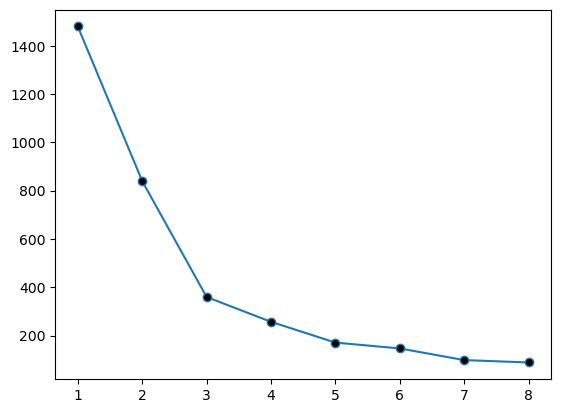

In [179]:
distortion=[]
for k in range(1,9):
    km_clstr=KMeans(n_clusters=k)
    km_clstr.fit(df_clstr)
    distortion.append(km_clstr.inertia_)
plt.plot(range(1,9),distortion,marker='o',markerfacecolor='0')
plt.show()

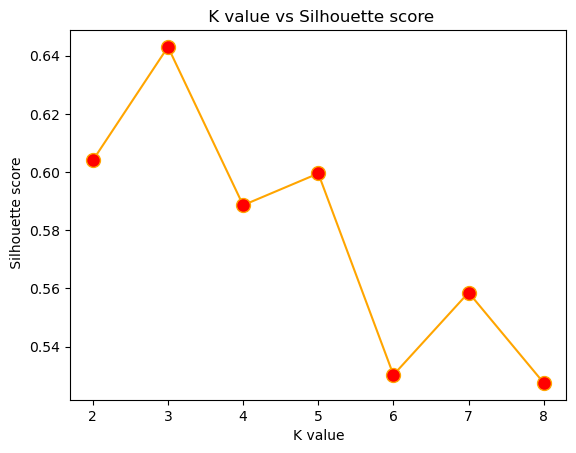

In [229]:
slht_score=[]
for n in range(2,9):
    slht_score.append(silhouette_score(df_clstr,KMeans(n_clusters=n,random_state=0).fit_predict(df_clstr)))
plt.plot(range(2,9),slht_score,color='orange',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K value')
plt.ylabel(' Silhouette score')
plt.title(' K value vs Silhouette score')
plt.show()

For n_cluster= 2 average silhouette score: 0.6040078744704434
For n_cluster= 3 average silhouette score: 0.6429965397115184
For n_cluster= 4 average silhouette score: 0.5885994774178244
For n_cluster= 5 average silhouette score: 0.599516416388649
For n_cluster= 6 average silhouette score: 0.5302787158837727
For n_cluster= 7 average silhouette score: 0.5585829474283485
For n_cluster= 8 average silhouette score: 0.5275261794970316


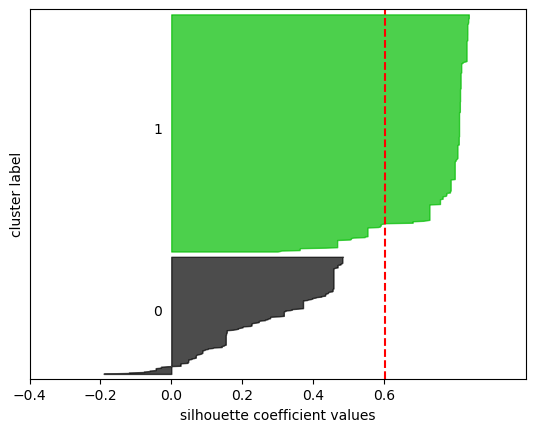

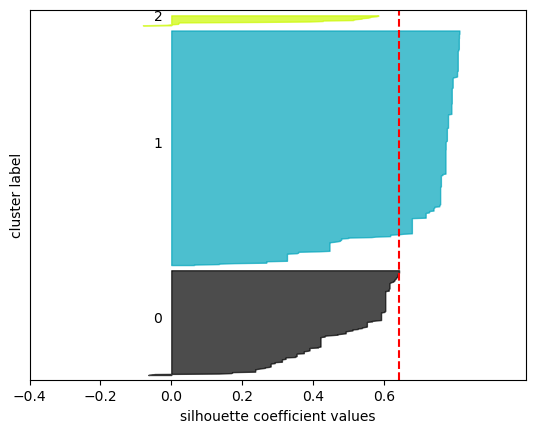

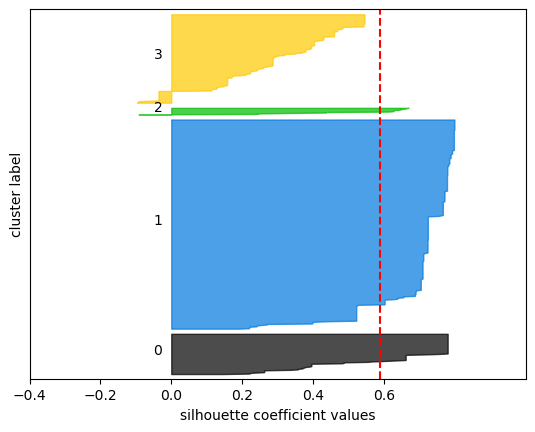

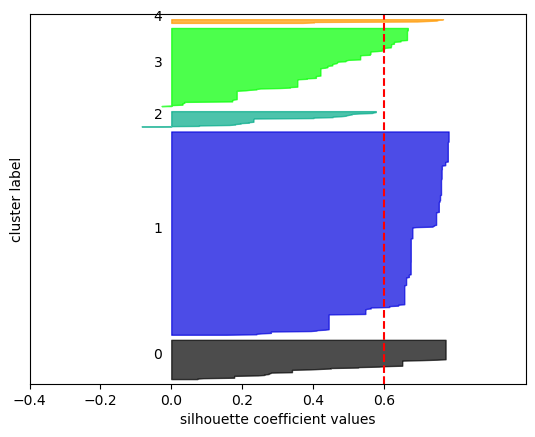

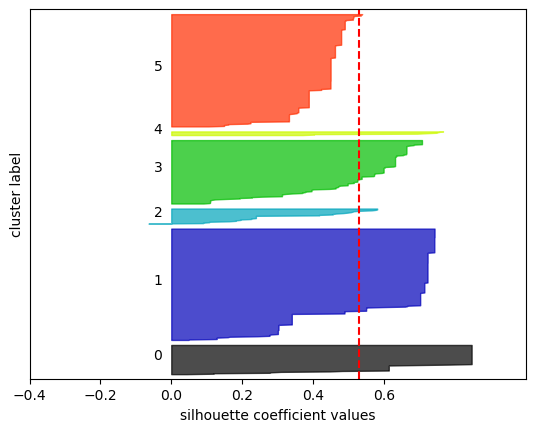

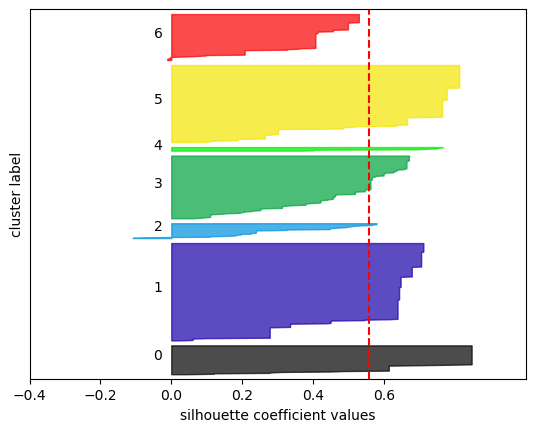

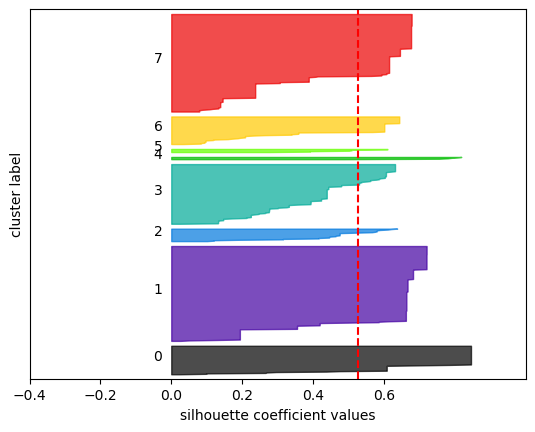

In [183]:
X=df_clstr
range_n_clusters=[2,3,4,5,6,7,8]
for n_cluster in range_n_clusters:
    figure,ax1=plt.subplots(1,1)
    ax1.set_xlim([-0.1,1])
    ax1.set_ylim([0,len(X)+(n_cluster+1)*10])
    cluster=KMeans(n_clusters=n_cluster,random_state=0)
    cluster_label=cluster.fit_predict(X)
    silhouette_avg=silhouette_score(X,cluster_label)
    print('For n_cluster=',n_cluster,'average silhouette score:',silhouette_avg)
    # compute silhouette score for each sample
    sample_silht_values=silhouette_samples(X,cluster_label)
    y_lower=10
    for i in range(n_cluster):
        ith_cluster_silht_values=sample_silht_values[cluster_label==i]
        ith_cluster_silht_values=np.sort(ith_cluster_silht_values)
        size_cluster_i=ith_cluster_silht_values.shape[0]
        y_upper=y_lower+size_cluster_i
        color=cm.nipy_spectral(float(i)/n_cluster)
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silht_values,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.05,y_lower+0.5*size_cluster_i,str(i))
        # compute the new y_lower for next plot
        y_lower=y_upper+10
    ax1.set_xlabel('silhouette coefficient values')
    ax1.set_ylabel('cluster label')
    # vertical line for avg slht score for all values
    ax1.axvline(x=silhouette_avg,c='r',ls='--')
    ax1.set_yticks([])
    ax1.set_xticks([-0.4,-0.2,0,0.2,0.4,0.6])
plt.show()

In [185]:
k=3
kmean_mod=KMeans(n_clusters=k,random_state=0)
kmean_mod.fit(df_clstr)
kmean_cntrd=kmean_mod.cluster_centers_
kmean_cntrd

array([[-0.02677954, -1.31109817],
       [-0.20104782,  0.61834185],
       [ 4.80294445, -0.71062561]])

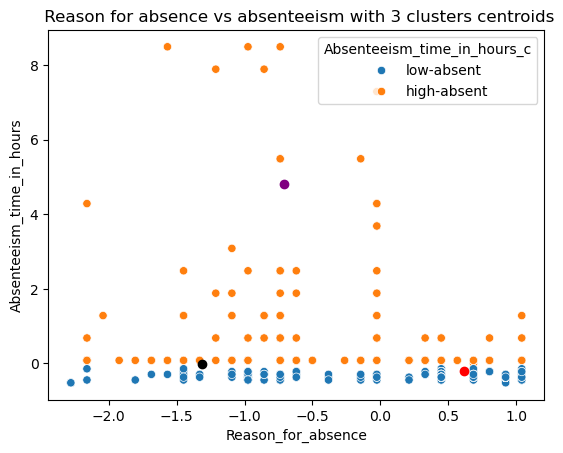

In [187]:
sns.scatterplot(data=empl1,x='Reason_for_absence',y='Absenteeism_time_in_hours',hue='Absenteeism_time_in_hours_c')
plt.scatter(-1.31109817,-0.02677954,color='black')
plt.scatter(0.61834185,-0.20104782,color='red')
plt.scatter(-0.71062561,4.80294445,color='purple')
plt.title(' Reason for absence vs absenteeism with 3 clusters centroids')
plt.show()

In [189]:
kmean_label=kmean_mod.labels_
kmean_label

array([1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0,

In [191]:
ch_index=calinski_harabasz_score(df_clstr,KMeans(n_clusters=k).fit(df_clstr).labels_)
ch_index

1146.263130106654

In [193]:
db_index=davies_bouldin_score(df_clstr,KMeans(n_clusters=k).fit(df_clstr).labels_)
db_index

0.553183989203883

In [195]:
silht_score=silhouette_score(df_clstr,KMeans(n_clusters=k).fit(df_clstr).labels_)
silht_score

0.6395018921484725

#### SUMMARY

#### CONCLUSION